<h1 align="center"><font size="5">LOGISTIC REGRESSION WITH TENSORFLOW</font></h1>


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y= pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

In [3]:
# numFeatures is the number of features in our input data.
# In the iris dataset, this number is '4'.
numFeatures = trainX.shape[1]
print('numFeatures is : ', numFeatures )

numFeatures is :  4


In [4]:
# numLabels is the number of classes our data points can be in.
# In the iris dataset, this number is '3'.
numLabels = trainY.shape[1]
print('numLabels is : ', numLabels )

numLabels is :  3


In [5]:
X = tf.Variable( np.identity(numFeatures), tf.TensorShape(numFeatures),dtype='float32') # Iris has 4 features, so X is a tensor to hold our data.
X

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [6]:
yGold = tf.Variable(np.array([1,1,1]),shape=tf.TensorShape(numLabels),dtype='float32') # This will be our correct answers matrix for 3 classes.
yGold

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>

In [7]:
trainX = tf.constant(trainX, dtype='float32')
trainX

<tf.Tensor: shape=(99, 4), dtype=float32, numpy=
array([[5.7, 3. , 4.2, 1.2],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [7.7, 2.8, 6.7, 2. ],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5. , 2.3, 3.3, 1. ],
       [5.1, 3.4, 1.5, 0.2],
       [5.6, 2.7, 4.2, 1.3],
       [6. , 3. , 4.8, 1.8],
       [4.6, 3.2, 1.4, 0.2],
       [5.7, 2.9, 4.2, 1.3],
       [6.8, 3. , 5.5, 2.1],
       [5.5, 4.2, 1.4, 0.2],
       [5.1, 2.5, 3. , 1.1],
       [6.7, 3. , 5.2, 2.3],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6. , 2.2, 5. , 1.5],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [6.5, 3. , 5.2, 2. ],
       [6.4, 3.1, 5.5, 1.8],
       [5. , 3.3, 1.4, 0.2],
       [5. , 3.2, 1.2, 

In [8]:
trainY = tf.constant(trainY, dtype='float32')
trainY

<tf.Tensor: shape=(99, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
      

In [9]:
testX = tf.constant(testX, dtype='float32')
testX

<tf.Tensor: shape=(50, 4), dtype=float32, numpy=
array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 3.8, 6.7, 2.2],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3.1, 5.6, 2.4],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [7.2, 3.6, 6.1, 2.5],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.3, 3.4, 5.6, 2.4],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [7.9, 3.8, 6.4, 2. ],
       [4.7, 3.2, 1.6, 0.2],
       [6.3, 2.7, 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [6.7, 3.3, 5.7, 2.5],
       [6.5, 3.2, 5.1, 2. ],
       [5.8, 2.7, 5.1, 1.9],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 

In [10]:
testY = tf.constant(testY, dtype='float32')
testY

<tf.Tensor: shape=(50, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
      

In [12]:
W = tf.Variable(tf.zeros([4, 3]))  # 4-dimensional input and  3 classes
W

<tf.Variable 'Variable:0' shape=(4, 3) dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [13]:
b = tf.Variable(tf.zeros([3])) # 3-dimensional output [0,0,1],[0,1,0],[1,0,0]
b

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

In [14]:
#Randomly sample from a normal distribution with standard deviation .01

weights = tf.Variable(tf.random.normal([numFeatures,numLabels],
                                       mean=0.,
                                       stddev=0.01,
                                       name="weights"),dtype='float32')

In [15]:
weights

<tf.Variable 'Variable:0' shape=(4, 3) dtype=float32, numpy=
array([[-0.00104856,  0.00147907, -0.00505806],
       [-0.00702136, -0.008312  , -0.00100379],
       [-0.01567086,  0.00174015, -0.00472187],
       [ 0.01170275,  0.00880664,  0.00996475]], dtype=float32)>

In [16]:
bias = tf.Variable(tf.random.normal([1,numLabels],
                                    mean=0.,
                                    stddev=0.01,
                                    name="bias"))

In [17]:
bias

<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[0.02112216, 0.00500387, 0.00278158]], dtype=float32)>

# Logistic Regression model

In [18]:
# Three-component breakdown of the Logistic Regression equation.
# Note that these feed into each other.
def logistic_regression(x):
    apply_weights_OP = tf.matmul(x, weights, name="apply_weights")
    add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
    activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")
    return activation_OP

In [19]:
# Number of Epochs in our training
numEpochs = 700
numEpochs

700

In [20]:
# Defining our learning rate iterations (decay)
learningRate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0008,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [21]:
learningRate

In [22]:
#Defining our cost function - Squared Mean Error
loss_object = tf.keras.losses.MeanSquaredLogarithmicError()
loss_object

In [23]:
optimizer = tf.keras.optimizers.SGD(learningRate)
optimizer

In [24]:
# Accuracy metric.
def accuracy(y_pred, y_true):
# Predicted class is the index of the highest score in prediction vector (i.e. argmax).

    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))

    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [25]:
# Optimization process. 

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = loss_object(pred, y)
    gradients = g.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))

In [26]:
# Initialize reporting variables
display_step = 10
epoch_values = []
accuracy_values = []
loss_values = []
loss = 0
diff = 1
# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in loss %g; convergence."%diff)
        break
    else:
        # Run training step
        run_optimization(trainX, trainY)
        
        # Report occasional stats
        if i % display_step == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            
            pred = logistic_regression(testX)

            newLoss = loss_object(pred, testY)
            # Add loss to live graphing variable
            loss_values.append(newLoss)
            
            # Generate accuracy stats on test data
            acc = accuracy(pred, testY)
            accuracy_values.append(acc)
            
    
            # Re-assign values for variables
            diff = abs(newLoss - loss)
            loss = newLoss

            #generate print statements
            print("step %d, training accuracy %g, loss %g, change in loss %g"%(i, acc, newLoss, diff))

        

          

# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %acc.numpy())

step 0, training accuracy 0.3, loss 0.13502, change in loss 0.13502
step 10, training accuracy 0.3, loss 0.134452, change in loss 0.000567928
step 20, training accuracy 0.3, loss 0.133893, change in loss 0.000559613
step 30, training accuracy 0.3, loss 0.133342, change in loss 0.000551313
step 40, training accuracy 0.3, loss 0.132798, change in loss 0.000543028
step 50, training accuracy 0.3, loss 0.132264, change in loss 0.000534758
step 60, training accuracy 0.3, loss 0.131737, change in loss 0.000526533
step 70, training accuracy 0.3, loss 0.131219, change in loss 0.000518292
step 80, training accuracy 0.3, loss 0.130709, change in loss 0.000510141
step 90, training accuracy 0.3, loss 0.130207, change in loss 0.00050199
step 100, training accuracy 0.3, loss 0.129718, change in loss 0.000488997
step 110, training accuracy 0.3, loss 0.129256, change in loss 0.000461861
step 120, training accuracy 0.3, loss 0.128801, change in loss 0.00045462
step 130, training accuracy 0.3, loss 0.128

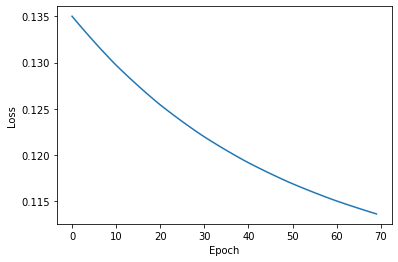

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values)
plt.show()